In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 101)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
pd.options.display.max_columns = 999


In [2]:
playerid_lookup("Flaherty","Jack")

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,flaherty,jack,-1,NaN,NaN,-1,NaN,NaN
1,flaherty,jack,-1,NaN,NaN,-1,NaN,NaN
2,flaherty,jack,656427,flahj002,flaheja01,17479,2017.0,2019.0


In [3]:
stats = statcast_pitcher('2019-09-19', '2019-09-20', 656427)

Gathering Player Data


In [4]:
stats.head()
stats_sorted = stats.sort_values(by=["at_bat_number","pitch_number"])
stats_sorted.reset_index()
stats_sorted["pitch_count"] = stats_sorted.index

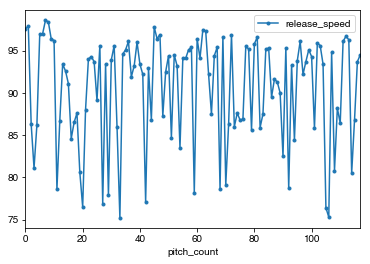

In [5]:
stats_sorted.plot(x="pitch_count", y="release_speed",marker=".")

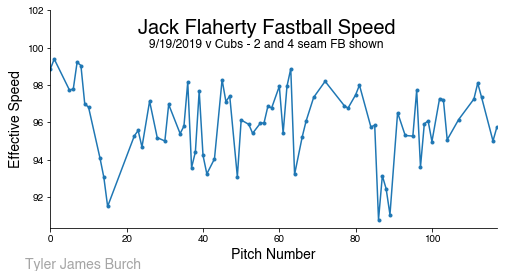

In [6]:
fbs = stats_sorted.query("pitch_name == '4-Seam Fastball' | pitch_name == '2-Seam Fastball'")
fb_sorted = fbs.sort_values(by=["at_bat_number","pitch_number"])
fb_sorted.reset_index()
fb_sorted["pitch_count"] = fb_sorted.index
fb_sorted.plot(x="pitch_count", y="effective_speed",marker=".", figsize=(8,4))
plt.ylabel("Effective Speed",fontsize=14)
plt.xlabel("Pitch Number",fontsize=14)
plt.gca().get_legend().remove()
sns.despine()
plt.ylim(top=102)
plt.figtext(.5,.80,"Jack Flaherty Fastball Speed", fontsize=20,ha="center")
plt.figtext(.5,.75,'9/19/2019 v Cubs - 2 and 4 seam FB shown', fontsize=12, ha='center')
plt.annotate(s="Tyler James Burch", xy=(.05,.01), xycoords='figure fraction',
            textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)
plt.savefig("../plots/flaherty.png")